In [6]:
%skip
conda env list
conda install -y matplotlib
conda install -y pandas

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/rafe/miniconda3/envs/honours2020

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    kiwisolver-1.2.0           |   py36hdb11119_0          87 KB  conda-forge
    matplotlib-3.2.1           |                0           6 KB  conda-forge
    matplotlib-base-3.2.1      |   py36hb8e4980_0         7.1 MB  conda-forge
    numpy-1.18.4               |   py36h7314795_0         5.2 MB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    pyparsing-2.4.7            |     pyh9f0ad1d_0          60 KB  conda-forge
    ------------------------------------------------------------

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import pandas as pd
import numpy as np
import re

In [3]:
# Read in index of list of json files (archived per day by Binder)
index = pd.read_json("https://archive.analytics.mybinder.org/index.jsonl",lines=True)

In [61]:
# This step might take a while
# get data based on a date range (e.g. 2020, 6, 20 to now)
now = datetime.datetime.now()
n = (now - datetime.datetime(2020, 6, 20)).days

# convert json to dataframe, limited by pattern (e.g. rafelyall)
pattern="rafelyall%2Fbiology"
frames = []
for idx, day in index.sort_index(ascending=False).iterrows():
    df = pd.read_json("https://archive.analytics.mybinder.org/{}".format(day['name']),lines=True)
    frames.append(df[df['spec'].str.contains(pattern)])
    if len(frames) > n:
        break
df = pd.concat(frames)
print(f"Fetched data for {n} days.")

Fetched data for 1 days.


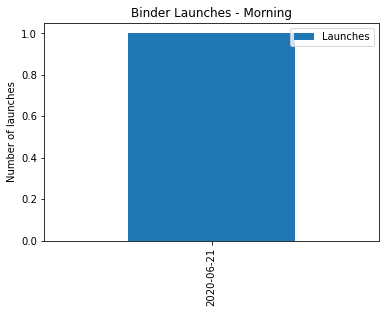

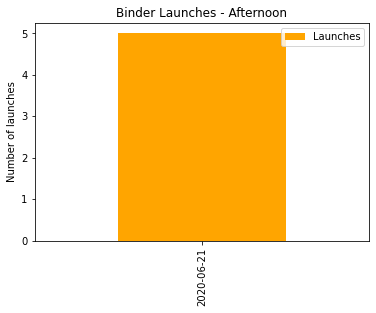

In [62]:
# Set the timestamp as the index
df2=df.set_index("timestamp")
df2=df2.rename(columns={"schema": "Launches"})

# Isolate morning vs afternoon
df2_morning=df2[df2.index.hour < 12]
df2_afternoon=df2[df2.index.hour >= 12]

# Count the number of occurences per day ("D")
df2_morning=df2_morning.resample('D').count()
df2_afternoon=df2_afternoon.resample('D').count()

# Morning plot
morning_plot=df2_morning[["Launches"]].plot.bar()
morning_plot.set_title("Binder Launches - Morning")
morning_plot.set_ylabel("Number of launches")
morning_plot.set_xlabel("")
morning_plot.set_xticklabels(df2_morning[["Launches"]].index.date);

# Afternoon plot
afternoon_plot=df2_afternoon[["Launches"]].plot.bar(color="orange")
afternoon_plot.set_title("Binder Launches - Afternoon")
afternoon_plot.set_ylabel("Number of launches")
afternoon_plot.set_xlabel("")
#afternoon_plot.set_yticks([1,2,3,4...])
afternoon_plot.set_xticklabels(df2_morning[["Launches"]].index.date);